# A Tour of Machine Learning Classifiers Using Scikit-Learn

In [18]:
from sklearn import datasets
import numpy as np

In [19]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [20]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, 
                                                    stratify=y)

In [22]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [25]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [26]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [27]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='none', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='Test set')

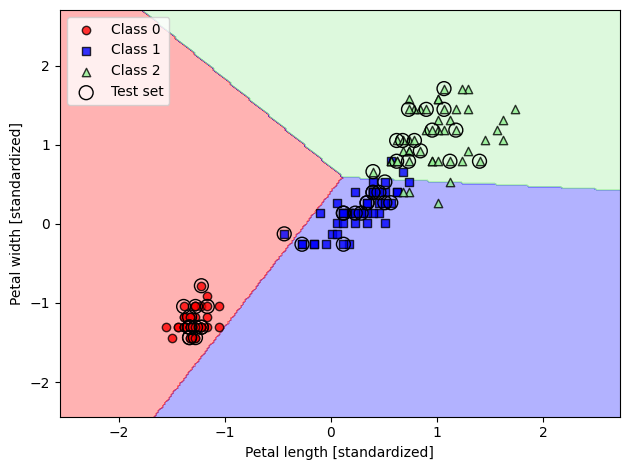

In [29]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
y=y_combined,
classifier=ppn,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Modeling Class Probabilities Via Logistic Regression

It's a linear model for classification.

We can think of the positive event as class label y = 1 and the symptoms as features x. Hence, for brevity, we can define the probability p as p := p(y = 1|x), the conditional probability that a particular example belongs to a certain class 1 given its features, x.

We can then further define the logit function, which is simply the logarithm of the odd (log-odds):

![Alt text](../images/7.png)

The logit function takes input values in the range 0 to 1 and transforms them into values over the entire real-number range.

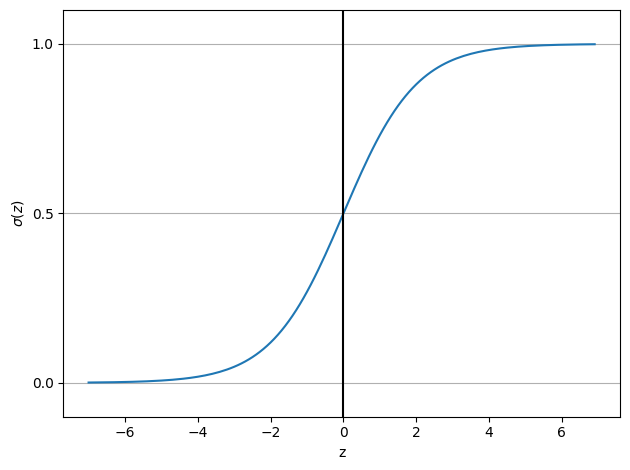

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

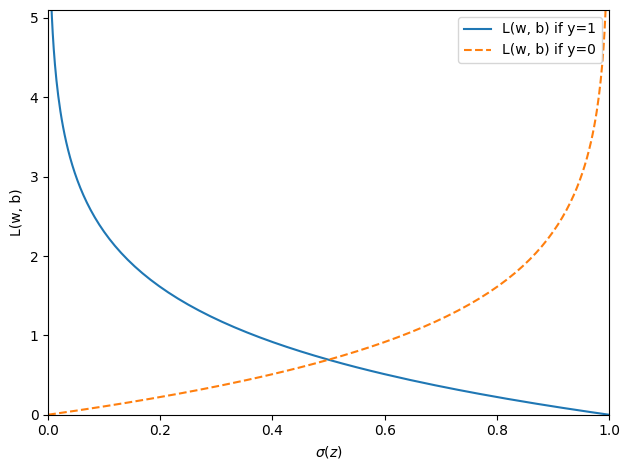

In [31]:
def loss_1(z):
    return - np.log(sigmoid(z))

def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Tackling Overfitting Via Regularization

"High variance" is proportional to overfitting and "high bias" is proportional to underfitting.

Regularization is a ver useful method for handling collinearity (high correlation amongfeatures), filtering out noise from data, and eventually preventing overfitting.

The idea is to introduce additional information to penalize extreme parameter (weights) values. 

Via the reguarization parmeter lambda, we can control how closely we fit the trianing data, while keeping the weights small. By increasing the value of lambda, we increase the regularization strength. 

/home/nathalie/Desktop/projects/ml-book/ml-book/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nathalie/Desktop/projects/ml-book/ml-book/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nathalie/Desktop/projects/ml-book/ml-book/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/n

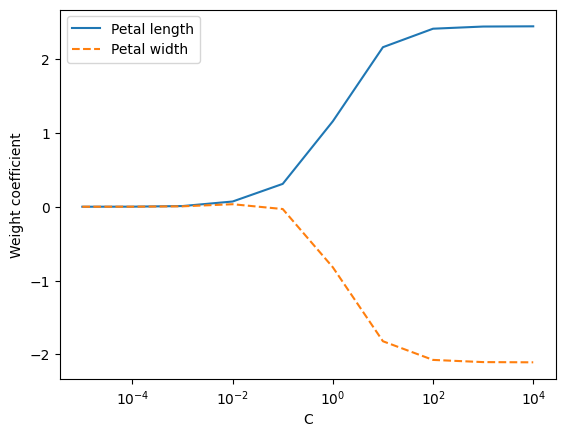

In [ ]:
from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
    multi_class='ovr')
    
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## Maximum Margin Classification With Support Vector Machines

SVM can be considered an extension of the perceptron, however, here our optimization objective is to maximize the margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and training examples that are closest to this hyperplane, which are also called **support vectors**.

![Alt text](../images/8.png)

The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error, whereas model with small margins are more prone to overfitting.

In SVM context, there's a variable referred to as C, which can be considered as a hyperparameter for controlling the penalty for misclassification. Large values of C correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for C.

![Alt text](../images/9.png)

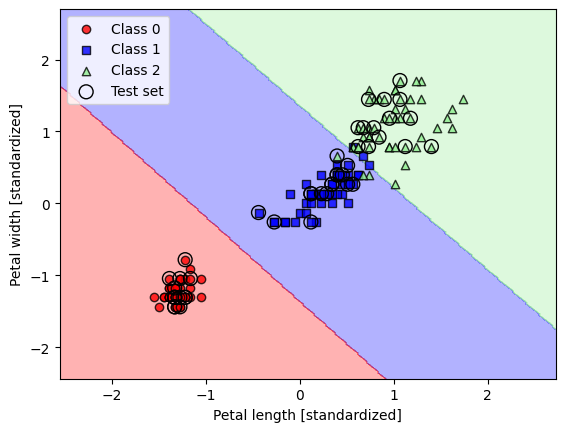

In [36]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
y_combined,
classifier=svm,
test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

In practical classification tasks, linear regression and linear SVMs often yield very similar results. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prome to outliers than SVM, which mostly cares about the points that are closest to the decision boundary (support vetors). On the other hand, logistic regression has the advantage of being easier to explain, the models can also be easily updated, which is attractive when working with streaming data.

## Solving NonLinear Problems Using a Kernel SVM

### Kernel Methods for Linearly Inseparable Data

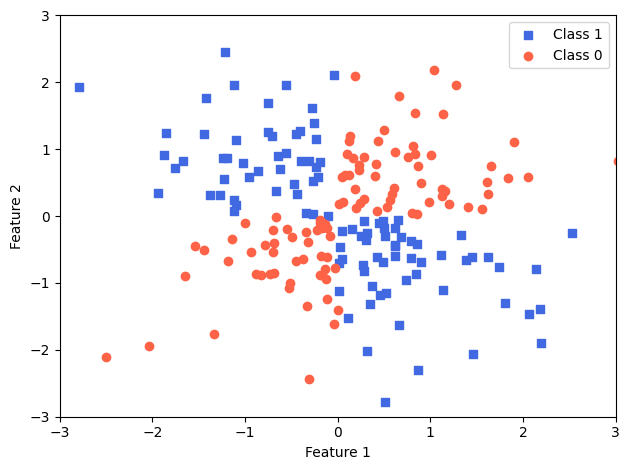

In [37]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
X_xor[y_xor == 1, 1],
c='royalblue', marker='s',
label='Class 1')

plt.scatter(X_xor[y_xor == 0, 0],
X_xor[y_xor == 0, 1],
c='tomato', marker='o',
label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The basic iea behind **kernel methods** for dealing with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher dimensional space via a mapping function, where the data becomes linearly separable. 

![Alt text](../images/10.png)

### Using The Kernel Trick To Find Separating Hyperplanes In a High-Dimensional Space

To solve nonlinear problem using an SVM, we would transform the training data into a higher-dimensional feature space via a mapping function, and train a linear SVM model to classify the data in this new feature space. Then, we could use the same mapping function to transform new, unsees data to classify it using the linear SVM model.

However, the construction of new features is computationally very expensive, especially if we are dealing with high dimensional data. This is where the **kernel trick** comes into play. 

We define a **kernel function**:

![Alt text](../images/11.png)

Roughly speaking, the term "kernel" can be interpreted as a **similarity function** between a pair of examples. The minus sign inverts the distance measure into a similarity socre, and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar examples) and 0 (for very dissimilar examples)

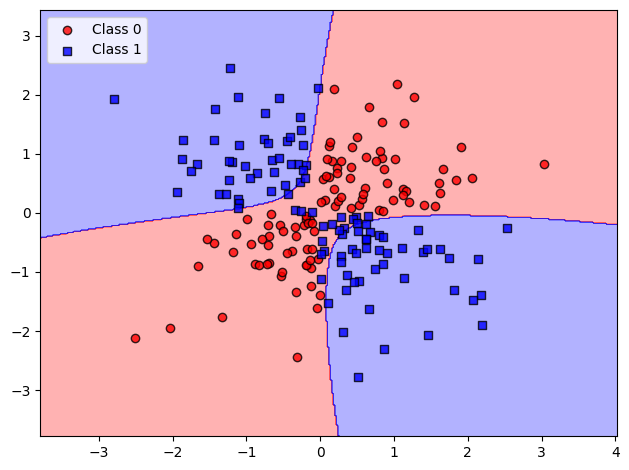

In [38]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

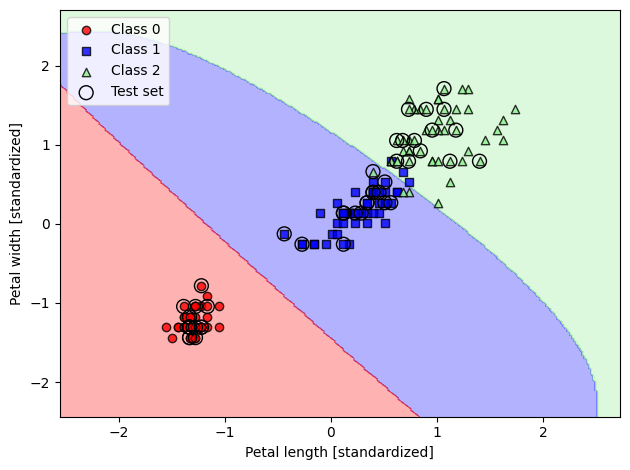

In [39]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
 y_combined, classifier=svm,
 test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

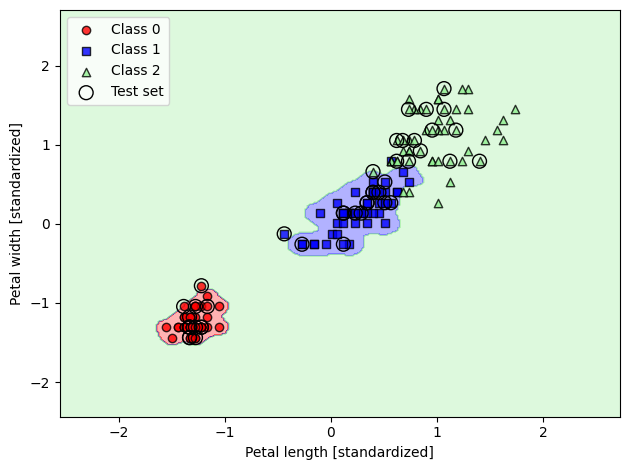

In [40]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)

svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
y_combined, classifier=svm,
test_idx=range(105,150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the gamma parameter also plays an important role in the controlling overfitting or variance when the alogrithm is too sensitive.

## Decision Tree Learning

**Decision tree** classifiers are attractive models if we care about interpretability. As the name "decision tree" suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.

Example:

![Alt text](../images/12.png)

We start at the root and split the data on the feature that results in the largest **information gain (IG)**. In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the training examples at each noe all belong to the same class. In practice, this can result in a very deep tree wit many nodes, which can easily lead to overfitting, Thus, we typically want to prune the tree by setting a limit for the maximum depth of the tree.

The imformation gain is the difference between the impurity of the parent node and the sum of the child node impurities, the lower the impurities of the child nodes, the larger the information gain

For simplicity and efficiency, most libraries implement binry decision trees, meaning that each parent node is split into two child nodes.

The three impurity measures or splitting criteria that are commonly used in binary decision trees are **Giny Impurity**, **Entropy**, and the **classification error**.

#### Entropy for all non empty classes

![Alt text](../images/13.png)

Here, p(i|t) is the proportion of the examples that belong to class i for a particular node, t. The entropy is therefore 0 if all examples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution. For example, in a binary class setting, the entropy is 0 if p(i=1|t) = 1 or p(i=0|t) = 0. If the classes are distributed uniformly with p(i=1|t) = 0.5 and p(i=0|t) = 0.5, the entropy is 1. Therefore, we can say that **the entropy criterion attempts to maximize the mutual information in the tree.**

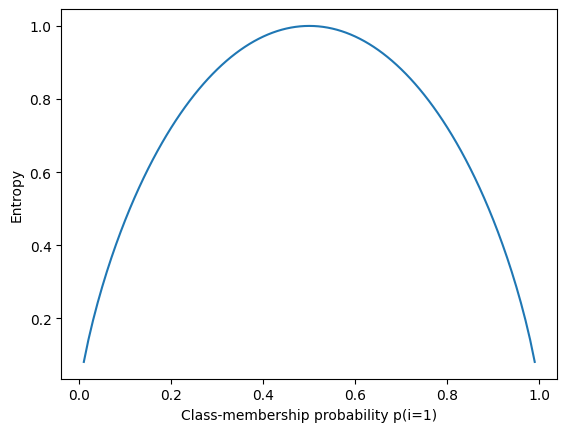

In [41]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

#### Gini Impurity

It can be understood as a criterion to miniize the probability of misclassification. It is maximal if the classes are perfectly mixed.

In practice both Gini impurity and entropy typically yield very similar results, and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs. 

#### Classification Error

This is a useful criterion for pruning, but not recommended for growing a decision tree, since it is less sensitive to changes in the class probabilities of the nodes.

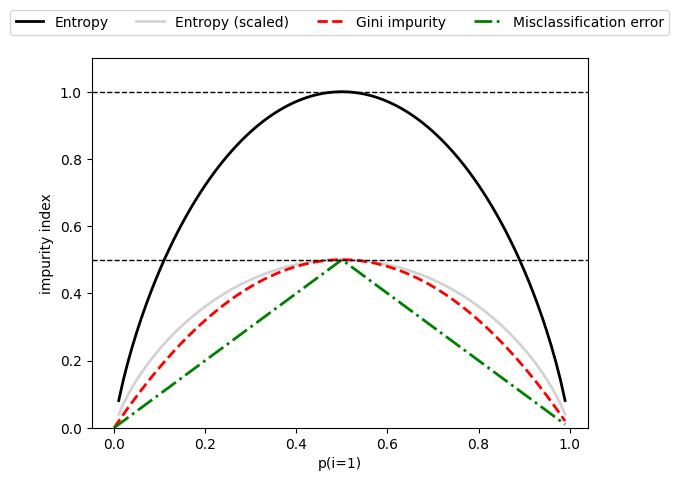

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p*(1 - p) + (1 - p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (scaled)',
    'Gini impurity', 'Misclassification error'], ['-', '-', '--', '-.'],
    ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,
    linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

### Building a Decision Tree

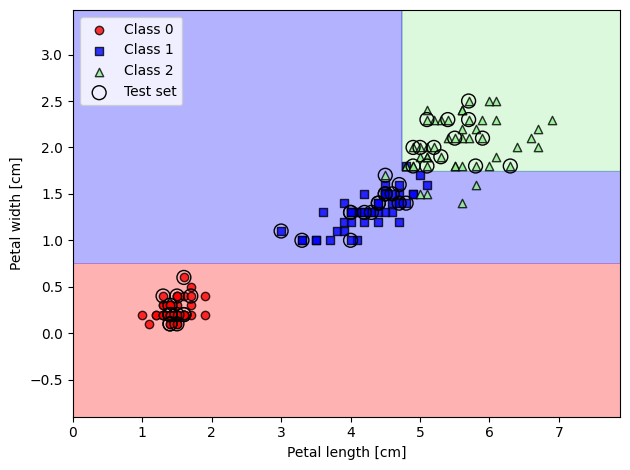

In [48]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3,
                                    random_state=1)

tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined,
                    y_combined,
                    classifier=tree_model,

test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

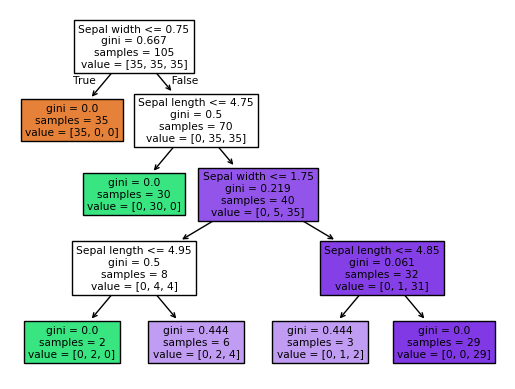

In [45]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

### Combining Multiple Decision Trees Via Random Forest

It is known for its good scalability and ease of use. It is an ensemble of decision trees.

The idea behind it is to average multiple (deep) decision trees that individually suffer from high variance to build a more robust model that individually suffer from high variance to build a more robust model that has a better generalization performance and is less suceptible to overfitting.

It can be summarized in four steps:
1. Draw a random bootstrap sample of size n (randomly choose n examples from the training
dataset with replacement).
2. Grow a decision tree from the bootstrap sample. At each node:

    a. Randomly select d features without replacement.
    
    b. Split the node using the feature that provides the best split according to the objective
    function, for instance, maximizing the information gain.
3. Repeat steps 1-2 k times.
4. Aggregate the prediction by each tree to assign the class label by majority vote.

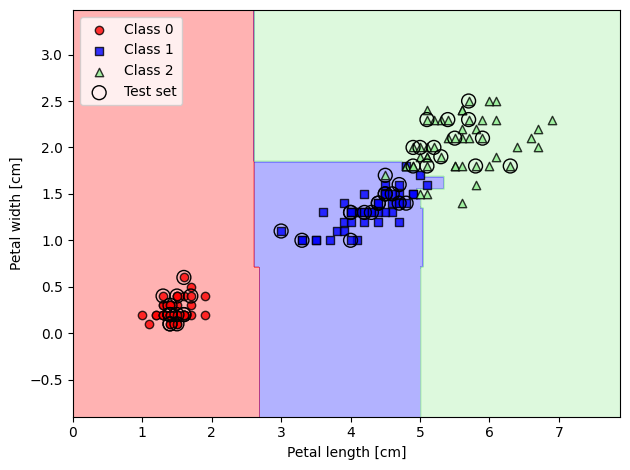

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,

classifier=forest, test_idx=range(105,150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## K-Nearest Neighbors - A Lazy Learning Algorithm

It's called "lazy" not because of its apparent simplicity, but because it doesn't learn a discriminative function from the training data but memorizes the training dataset instead

#### Parametric vs Non-Parametrics Models

ML algorithms can be grouped into paremetric and non parametric models. Using parametric models, we estimated parmeters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. 

Non-parametric models can't be characterized by a fixed set of parameters, and the number of parameters, and the number of parameters changes with the amount of training daata.

KNN belongs to a subcategory of non parametrics models described as instance based learning. Models bsed on instance-based learning are characterized by memorizing the training dataset, and lazy learning is a special case of insrance based learning that is associated with no cost during the learning process.

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:
1. Choose the number of k and a distance metric
2. Find the k-nearest neighbors of the data record that we want to classify
3. Assign the class label by majority vote

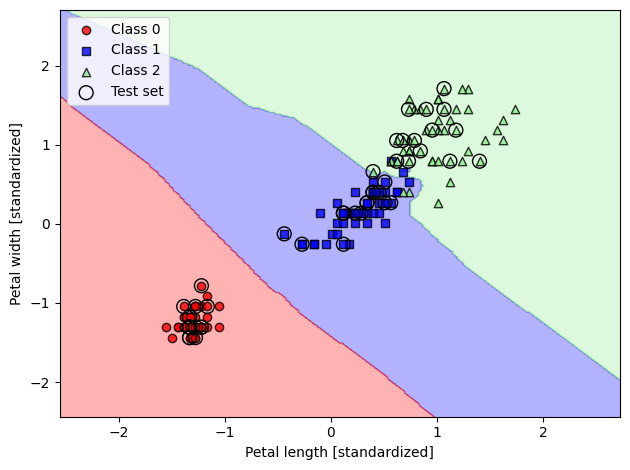

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,

classifier=knn, test_idx=range(105,150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The right choice of k is crucial to finding a good balance between overfitting and underfitting. We also have to make a choice about the distance metrics that is appropiate for the features in the dataset. 

Lastly, it is important to mention that KNN is very susceptible to overfitting due to the curse of dimensionality. The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. We can think of even the closest neighbors as being too far away in a high-dimensional space to give a good estimate.